# Model data

In this tutorial we will inspect how the different models are defined in PySM and how you can inspect the templates.

The notebook cell with all `import` statements is hidden, see the "Getting started" tutorial.

In [1]:
import pysm
import pysm.units as u
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sky = pysm.Sky(nside=128, preset_strings=["d1"])

In [3]:
sky.components[0].__class__

pysm.models.dust.ModifiedBlackBody

In [4]:
print(pysm.models.dust.ModifiedBlackBody.__init__.__doc__)

 This function initializes the modified black body model.

        The initialization of this model consists of reading in emission
        templates from file, reading in spectral parameter maps from
        file.

        Parameters
        ----------
        map_I, map_Q, map_U: `pathlib.Path` object
            Paths to the maps to be used as I, Q, U templates.
        unit_* : string or Unit
            Unit string or Unit object for all input FITS maps, if None, the input file
            should have a unit defined in the FITS header.
        freq_ref_I, freq_ref_P: Quantity or string
            Reference frequencies at which the intensity and polarization
            templates are defined. They should be a astropy Quantity object
            or a string (e.g. "1500 MHz") compatible with GHz.
        map_mbb_index: `pathlib.Path` object or scalar value
            Path to the map to be used as the power law index for the dust
            opacity in a modified blackbody model, fo

Details of a model are defined in `presets.cfg` at https://github.com/healpy/pysm/blob/master/pysm/data/presets.cfg, for example:

```
[d1]
class = "ModifiedBlackBody"
map_I = "pysm_2/dust_t_new.fits"
map_Q = "pysm_2/dust_q_new.fits"
map_U = "pysm_2/dust_u_new.fits"
unit_I = "uK_RJ"
unit_Q = "uK_RJ"
unit_U = "uK_RJ"
map_mbb_index = "pysm_2/dust_beta.fits"
map_mbb_temperature = "pysm_2/dust_temp.fits"
unit_mbb_temperature = "K"
freq_ref_I = "545 GHz"
freq_ref_P = "353 GHz"
```

The filenames refer to another Github repository: https://github.com/healpy/pysm-data/tree/master/pysm_2

PySM 3 automatically downloads and caches those data using the `astropy.utils.data` facilities. Therefore the first time you use `d1` it downloads all the templates and caches them in your home folder, next will load from there.

## Inspect model inputs

Model templates are stored as attributes of the model class and can be inspected and even modified in place.

In [5]:
dust = sky.components[0]

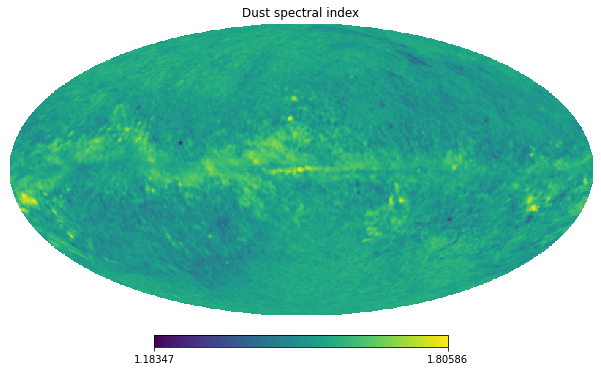

In [6]:
hp.mollview(dust.mbb_index, title="Dust spectral index", unit=dust.mbb_index.unit)

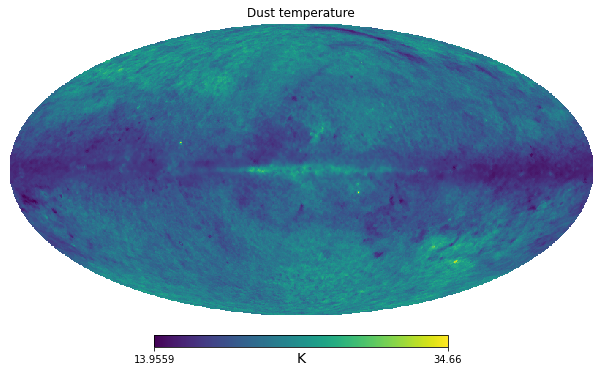

In [7]:
hp.mollview(dust.mbb_temperature, title="Dust temperature", unit=dust.mbb_temperature.unit)